In [1]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets,io,transforms
from torchvision.models.mobilenetv3 import *
from torchvision.models import MobileNet_V3_Small_Weights
from torch import nn
import timeit

In [2]:
#device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
#Data Transform
data_tr=transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])

In [4]:
#Creating Dataset
train_data=datasets.ImageFolder(root=r'C:\Users\Sudip\Desktop\New folder\Data\Train data',transform=data_tr)
test_data=datasets.ImageFolder(root=r'C:\Users\Sudip\Desktop\New folder\Data\Test data',transform=data_tr)
Classes=train_data.classes
Classes

['Bandhani', 'Ilkal', 'Kasavu', 'Sambalpuri']

torch.Size([3, 224, 224])

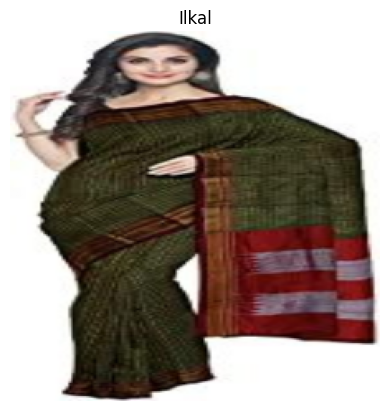

In [5]:
#Viewing the data
import matplotlib.pyplot as plt
import random
N=random.randint(0,500)
plt.imshow(train_data[N][0].permute(1,2,0))
plt.title(f"{Classes[train_data[N][1]]}")
plt.axis(False)
train_data[N][0].shape

In [6]:
#Creating dataloader
Batch_size=32
Train_dataloader=DataLoader(train_data,Batch_size,shuffle=True)
Test_dataloader=DataLoader(test_data,Batch_size,shuffle=True)

In [171]:
#Using MobileNetv3
model_0=mobilenet_v3_small(weights=None)
model_0.classifier[3]=nn.Linear(in_features=1024,out_features=4,bias=True)
model_0.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [172]:
#loss function & optimiser
loss_fn=torch.nn.CrossEntropyLoss()
optim=torch.optim.Adam(params=model_0.parameters(),lr=0.001)

Epoch:0| Train accuracy:0.7922257532956686|Train loss:0.5911304999963712|Test acc:0.5117559523809524|Test loss:1.1822545289993287
Epoch:1| Train accuracy:0.8692914312617702|Train loss:0.35719202282065055|Test acc:0.32723214285714286|Test loss:1.244342307249705
Epoch:2| Train accuracy:0.8929790489642184|Train loss:0.2888131127771685|Test acc:0.334672619047619|Test loss:1.5353783011436462
Epoch:3| Train accuracy:0.9189618644067796|Train loss:0.23701639429239904|Test acc:0.30952380952380953|Test loss:1.7756038745244345
Epoch:4| Train accuracy:0.9288488700564972|Train loss:0.2042134084849287|Test acc:0.49568452380952377|Test loss:1.1391089737415314
Epoch:5| Train accuracy:0.9345574387947269|Train loss:0.17962133998082855|Test acc:0.5226190476190476|Test loss:1.791241180896759
Epoch:6| Train accuracy:0.9448858286252354|Train loss:0.1600676575217838|Test acc:0.8535714285714285|Test loss:0.535979672273
Epoch:7| Train accuracy:0.943826506591337|Train loss:0.16644396684211443|Test acc:0.7619047

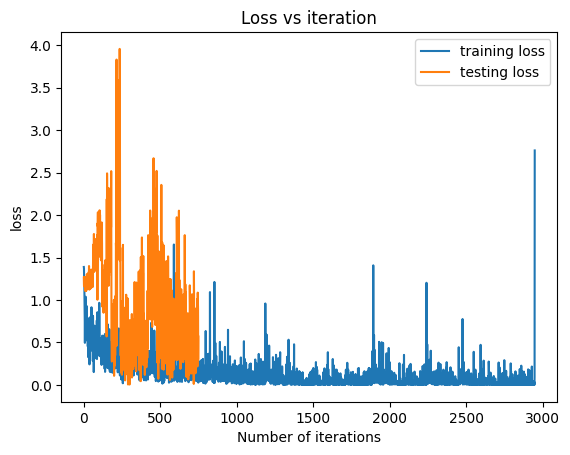

In [173]:
#Training and Testing
NUM_EPOCHS=25
st=timeit.default_timer()
train_loss_trend=[]
test_loss_trend=[]
for epoch in range(NUM_EPOCHS):
    #turning on training mode
    train_loss,train_acc,test_loss,test_acc,=0,0,0,0
    model_0.train()
    for batch, (X,y) in enumerate(Train_dataloader):
        #moving data to GPU
        X,y=X.to(device),y.to(device)
        y_=model_0(X)
        #calculating and storing loss
        loss=loss_fn(y_,y)
        train_loss += loss.item()
        train_loss_trend.append(loss.item())
        optim.zero_grad()#necessary
        #backpropagation
        loss.backward()
        #step ahead with optimisation
        optim.step()
        #prediction accuracy
        y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_)
    #turing on testing mode
    model_0.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(Test_dataloader):
            X,y=X.to(device),y.to(device)
            y_=model_0(X)
            loss=loss_fn(y_,y)
            test_loss += loss.item()
            test_loss_trend.append(loss.item())
            y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
            test_acc += (y_pred_class == y).sum().item()/len(y_)
    train_loss,train_acc,test_loss,test_acc,=train_loss/len(Train_dataloader),train_acc/len(Train_dataloader),test_loss/len(Test_dataloader),test_acc/len(Test_dataloader)
    print(f"Epoch:{epoch}| Train accuracy:{train_acc}|Train loss:{train_loss}|Test acc:{test_acc}|Test loss:{test_loss}")
ed=timeit.default_timer()
print(f"Total time:{(ed-st)}")
plt.plot(train_loss_trend,label='training loss')
plt.plot(test_loss_trend,label='testing loss')
plt.title('Loss vs iteration')
plt.xlabel('Number of iterations')
plt.ylabel('loss')
plt.legend()

In [169]:
Datlod=DataLoader(test_data,1,True)
(X,y)=next(iter(Datlod))
y=y.to(device)
print(f'target : {y}')
with torch.inference_mode():
    X=X.to(device)
    y_=model_0(X)
    print(y_)
    print(f'prediction : {torch.softmax(y_,dim=1).argmax()}')
    print(loss_fn(y_,y))
    print(loss_fn(y_,y).item())


target : tensor([1], device='cuda:0')
tensor([[-4.0647, -1.8746,  9.1504, -3.4375]], device='cuda:0')
prediction : 2
tensor(11.0250, device='cuda:0')
11.025005340576172


(-0.5, 223.5, 223.5, -0.5)

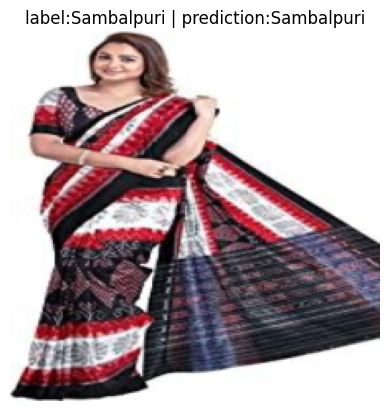

In [252]:
Datlod=DataLoader(test_data,1,True)
(X,y)=next(iter(Datlod))
y=y[0]
with torch.inference_mode():
    X=X.to(device)
    y_=model_0(X).argmax()
plt.imshow(X.to('cpu').squeeze().permute(1,2,0))
plt.title(f"label:{Classes[y]} | prediction:{Classes[y_]}")
plt.axis(False)